# Bank Marketing Clustering Analysis
This notebook performs a complete clustering analysis on the Bank Marketing dataset. It is structured for clarity, reproducibility, and sharing on GitHub.

**Objectives:**
- Load and explore the dataset
- Clean and preprocess data
- Select relevant features for clustering
- Perform exploratory data analysis (EDA)
- Apply KMeans clustering and determine optimal clusters
- Visualize and interpret clusters
- Summarize key findings and insights

**Usage Notes:**
- All code and comments are in English for wider accessibility.
- Each step is explained in Markdown cells for clarity.
- The notebook is modular and ready for reuse or extension.
- For more details on clustering algorithms, see [scikit-learn documentation](https://scikit-learn.org/stable/modules/clustering.html).

## Library Imports
All required libraries for data analysis, preprocessing, clustering, and visualization are imported below.

**Note:**
All libraries are standard for machine learning and clustering tasks in Python.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

## Dataset Overview
The dataset used is the Bank Marketing dataset, containing information about direct marketing campaigns of a Portuguese banking institution.
- Source: https://www.kaggle.com/datasets/sahistapatel96/bankadditionalfullcsv
- Includes both numerical and categorical features relevant for clustering.
- No missing values are present in the dataset.

## Load Data
Load the CSV file into a pandas DataFrame and display its structure.

**Note:**
The first five rows and DataFrame info help verify successful loading and understand the dataset structure.

In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/ML2023/course23/L 25/bank-full.csv", sep=',')
display(df.head())  # Show first 5 rows
df.info()  # Show DataFrame structure

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Data Cleaning & Preprocessing
Handle missing values, scale numerical features, and encode categorical features for clustering.

**Note:**
Replacing 'unknown' values and scaling/encoding features ensures the data is suitable for clustering algorithms.

In [ ]:
# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=[np.number])
categorical_features = df.select_dtypes(include=['object'])

# Replace 'unknown' in categorical features with mode (most frequent value)
for col in categorical_features.columns:
    if 'unknown' in categorical_features[col].unique():
        mode_value = categorical_features[col][categorical_features[col] != 'unknown'].mode()[0]
        categorical_features[col] = categorical_features[col].replace('unknown', mode_value)

# Scale numerical features for clustering
scaler = StandardScaler()
scaled_numerical_df = pd.DataFrame(scaler.fit_transform(numerical_features), columns=numerical_features.columns)

# One-hot encode categorical features (drop first to avoid multicollinearity)
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
one_hot_encoded_categorical_df = pd.DataFrame(encoder.fit_transform(categorical_features), columns=encoder.get_feature_names_out(categorical_features.columns))

# Combine processed features
processed_df = pd.concat([scaled_numerical_df, one_hot_encoded_categorical_df], axis=1)
display(processed_df.head())

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,subscribed_yes
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Feature Selection
Select relevant features for clustering, excluding columns that may bias results.

**Note:**
The 'duration' column is excluded as it is not recommended for predictive modeling in this context.

In [ ]:
# Exclude 'duration' from clustering features (not recommended for predictive modeling)
features_for_clustering = processed_df.drop(columns=['duration'])
display(features_for_clustering.head())
print("Shape of features_for_clustering:", features_for_clustering.shape)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,subscribed_yes
0,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.628993,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.290186,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.002309,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Shape of features_for_clustering: (41188, 47)


## Exploratory Data Analysis (EDA)
Display descriptive statistics and visualize feature distributions to understand the data.

**Note:**
Histograms and box plots help identify feature distributions and potential outliers.

Descriptive statistics of features for clustering:


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,subscribed_yes
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,41188.000000,4.118800e+04,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,-1.880382e-16,-7.590531e-17,-2.580781e-16,5.520386e-18,7.797546e-17,-3.315820e-14,-1.352495e-16,0.000000,-1.024860e-14,0.224677,...,0.099568,0.017432,0.013839,0.206711,0.209357,0.196416,0.197485,0.863431,0.033335,0.112654
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012,1.000012e+00,0.417375,...,0.299427,0.130877,0.116824,0.404951,0.406855,0.397292,0.398106,0.343396,0.179512,0.316173
min,-2.209365e+00,-5.659220e-01,-5.149443e+00,-3.494943e-01,-2.216433e+00,-2.374889e+00,-2.224953e+00,-1.722351,-2.815697e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.699804e-01,-5.659220e-01,1.954139e-01,-3.494943e-01,-1.197935e+00,-8.649547e-01,-4.747909e-01,-1.312994,-9.402810e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,-1.942267e-01,-2.049085e-01,1.954139e-01,-3.494943e-01,6.480923e-01,2.994571e-01,-2.803284e-01,0.712460,3.316799e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6.694038e-01,1.561049e-01,1.954139e-01,-3.494943e-01,8.390606e-01,7.227225e-01,8.864466e-01,0.772422,8.451701e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,5.563310e+00,1.928982e+01,1.954139e-01,1.379492e+01,8.390606e-01,2.058168e+00,2.939106e+00,0.820853,8.451701e-01,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


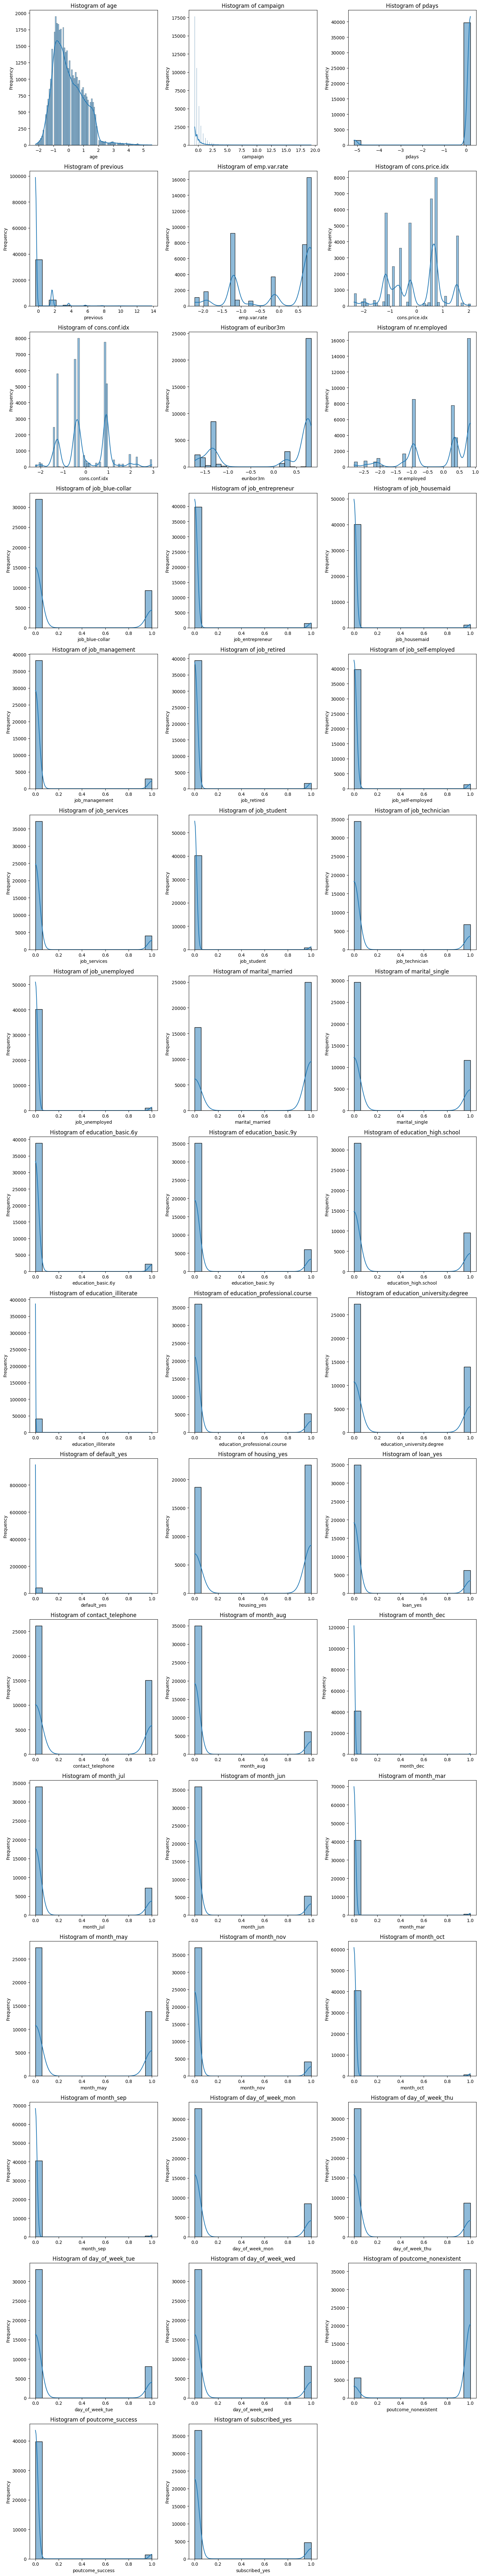

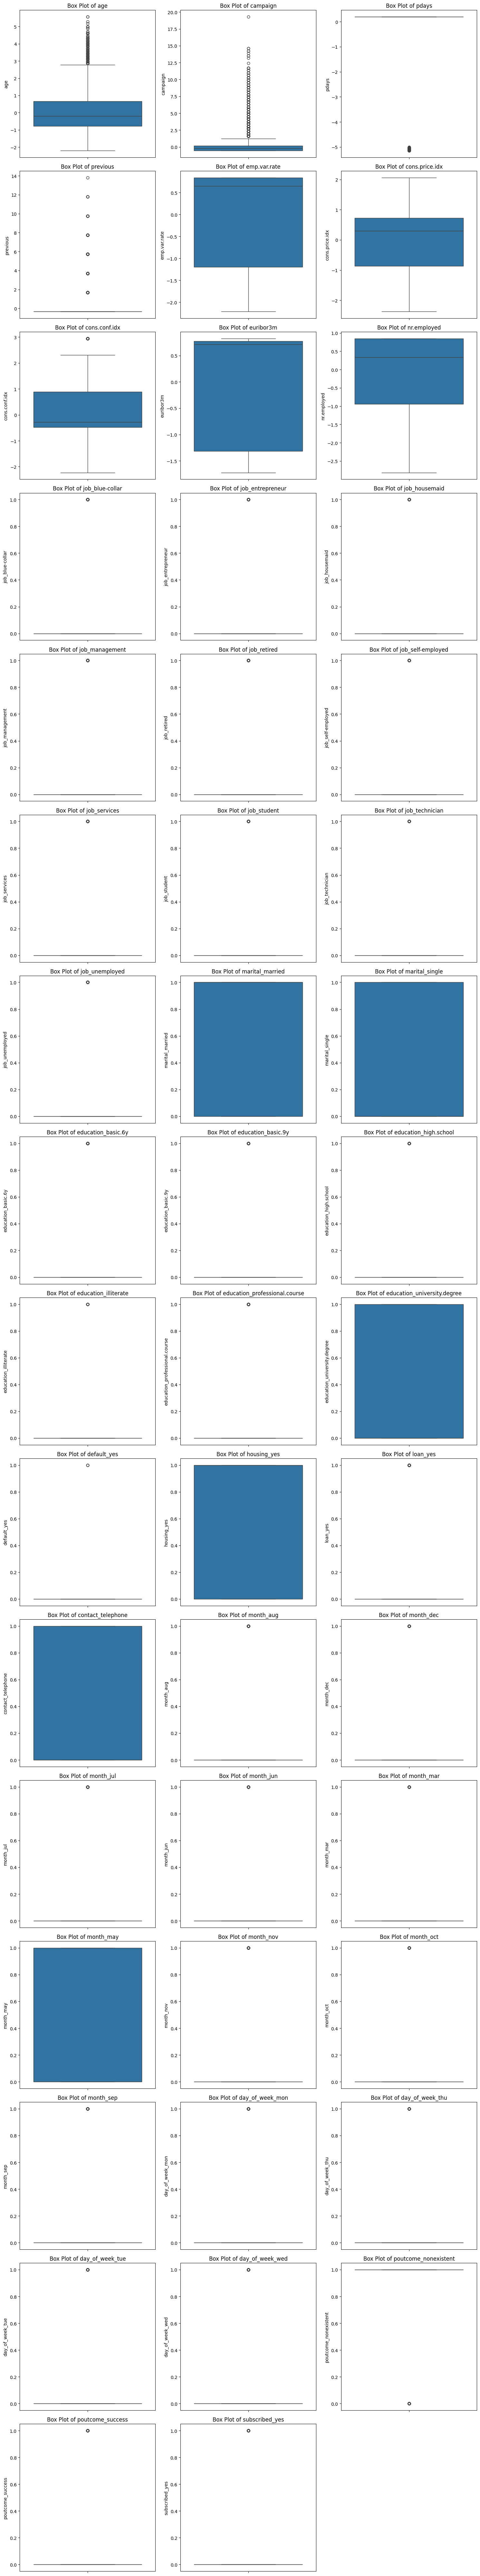

In [ ]:
print("Descriptive statistics of features for clustering:")
display(features_for_clustering.describe())

# Visualize distributions of numerical features
numerical_cols = features_for_clustering.select_dtypes(include=[np.number]).columns
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(features_for_clustering[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

# Box plots for outlier detection
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=features_for_clustering[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

## Optimal Number of Clusters
Use the Elbow method and Silhouette score to determine the best number of clusters for KMeans.

**Note:**
Visual inspection of the Elbow and Silhouette plots guides the selection of the optimal cluster count.

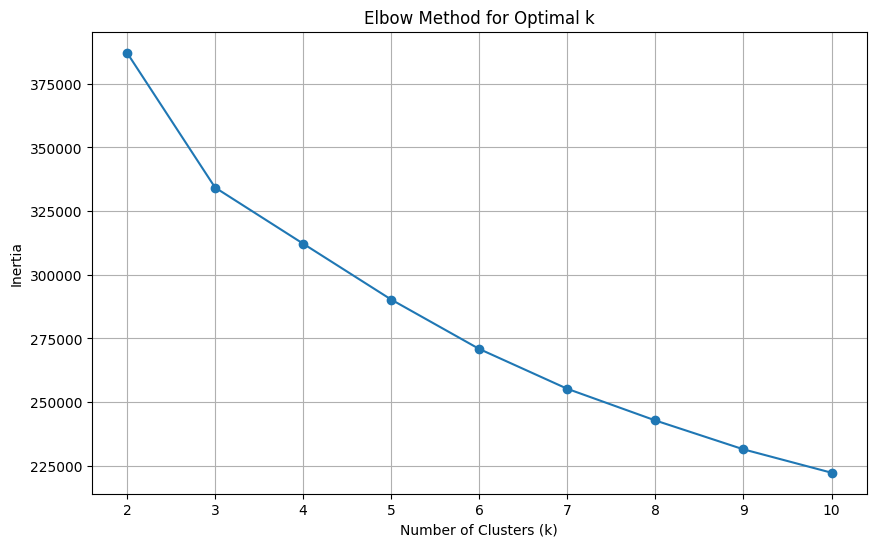

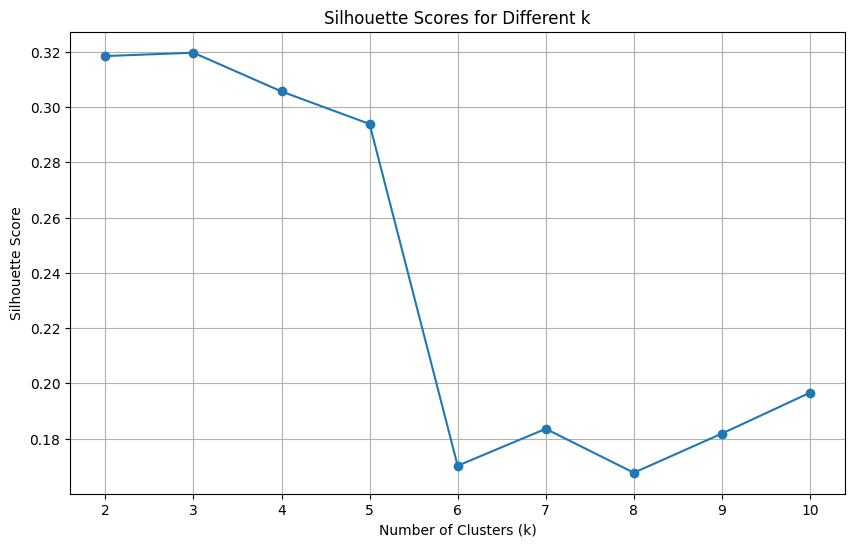

Based on the Elbow method and Silhouette scores, the optimal number of clusters appears to be: 3


In [ ]:
# Test different cluster counts using Elbow and Silhouette methods
k_range = range(2, 11)
inertia_scores = []
silhouette_scores = []

for n_clusters in k_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(features_for_clustering)
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_for_clustering, kmeans.labels_))

# Plot Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_scores, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Plot Silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Choose optimal number of clusters (visual inspection)
optimal_n_clusters = 3
print(f"Optimal number of clusters: {optimal_n_clusters}")

## Apply Clustering
Run KMeans with the selected number of clusters and assign cluster labels to the data.

**Note:**
Cluster labels are used for further analysis and visualization.

In [ ]:
# Fit KMeans and assign cluster labels
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init=10)
kmeans.fit(features_for_clustering)
features_for_clustering['cluster'] = kmeans.labels_
cluster_sizes = features_for_clustering['cluster'].value_counts()
display(cluster_sizes)

,count
cluster,
1,27645
0,12002
2,1541


## Cluster Visualization
Visualize clusters in reduced dimensions using PCA for better interpretation.

**Note:**
PCA helps visualize high-dimensional clusters in two dimensions.

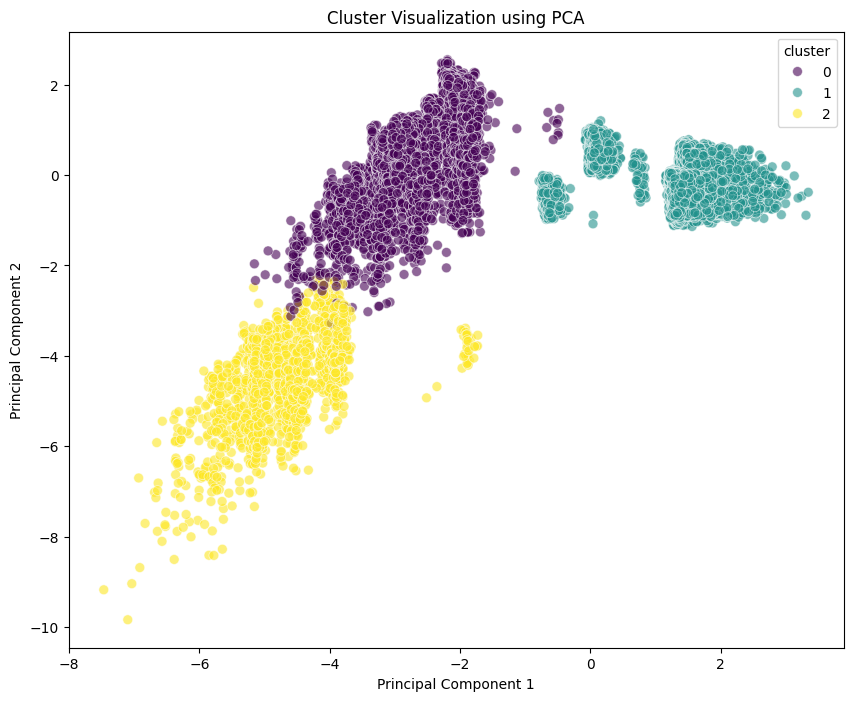

In [ ]:
# Reduce dimensionality for visualization (PCA)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_for_clustering.drop(columns=['cluster']))
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = features_for_clustering['cluster']

# Scatter plot of clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=pca_df, palette='viridis', s=50, alpha=0.6)
plt.title('Cluster Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Cluster Interpretation
Summarize the characteristics and sizes of each cluster for actionable insights.

**Note:**
Cluster summaries help identify target groups and inform future marketing strategies.

In [ ]:
# Summarize cluster characteristics and sizes
merged_df = pd.merge(df, features_for_clustering[['cluster']], left_index=True, right_index=True)
numerical_cluster_summary = merged_df.groupby('cluster')[numerical_features.columns].mean()
categorical_cluster_summary = merged_df.groupby('cluster')[categorical_features.columns].agg(lambda x: x.mode()[0] if not x.mode().empty else 'No mode')
print("Numerical Cluster Summary:")
display(numerical_cluster_summary)
print("\nCategorical Cluster Summary:")
display(categorical_cluster_summary)
cluster_sizes = features_for_clustering['cluster'].value_counts()
print("\nCluster Sizes:")
display(cluster_sizes)

Numerical Cluster Summary:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
cluster,,,,,,,,,,
0,39.390935,263.775537,2.124813,999.000000,0.317697,-2.025487,92.986597,-43.190385,1.202402,5077.981578
1,40.192838,252.392512,2.800940,999.000000,0.025249,1.117819,93.843861,-39.456763,4.818496,5213.419671
2,41.927320,321.231668,1.829981,22.768332,1.695652,-2.089228,93.352234,-38.330889,0.983230,5028.522648



Categorical Cluster Summary:


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,subscribed
cluster,,,,,,,,,,,
0,admin.,married,university.degree,no,yes,no,cellular,may,mon,nonexistent,no
1,admin.,married,university.degree,no,yes,no,cellular,may,wed,nonexistent,no
2,admin.,married,university.degree,no,yes,no,cellular,may,thu,success,yes



Cluster Sizes:


,count
cluster,
1,27645
0,12002
2,1541


## Summary:

### Data Analysis Key Findings

*   The dataset contains 41,188 entries and 21 columns with no missing values.
*   The data includes numerical features (e.g., age, balance, duration, campaign, pdays, previous, euribor3m, emp.var.rate, cons.price.idx, cons.conf.idx, nr.employed) and categorical features (e.g., job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y).
*   Categorical features with 'unknown' values were handled by replacing 'unknown' with the mode of the respective column.
*   Numerical features were scaled using `StandardScaler`, and categorical features were one-hot encoded, dropping the first category for each to avoid multicollinearity.
*   The 'duration' column was excluded from the features used for clustering.
*   The Elbow method and Silhouette analysis both indicated that 3 is the optimal number of clusters.
*   KMeans clustering with 3 clusters resulted in the following cluster sizes: Cluster 1: 27645, Cluster 0: 12002, Cluster 2: 1541.
*   PCA was used to reduce the features to 2 components for visualization, showing some separation between the clusters in the scatter plot.
*   **Cluster 0:** Second largest cluster, lower average age, shorter average call duration, high proportion of individuals not previously contacted or with non-existent previous outcomes, lower average euribor rates, less likely to be subscribed.
*   **Cluster 1:** Largest cluster, slightly higher average age than Cluster 0, similar average call duration, highest average euribor rates, predominantly not subscribed.
*   **Cluster 2:** Smallest cluster, highest average age, significantly longer average call duration, high proportion of individuals with a "success" outcome from previous campaigns, lowest average euribor rates, high rate of subscription.

### Insights or Next Steps

*   Cluster 2 appears to represent a group of older individuals with a history of successful campaign outcomes, higher engagement (longer call duration), and a higher likelihood of subscription. This cluster could be a valuable target for future campaigns, potentially with tailored strategies.
*   Clusters 0 and 1 are larger groups that are less likely to have subscribed. Further analysis could focus on understanding the differences between these two clusters to refine targeting strategies for non-subscribed individuals.


---
## Reusability & References
- This notebook is modular and can be adapted for other clustering tasks or datasets.
- For further reading on clustering and preprocessing, see:
    - [scikit-learn Clustering](https://scikit-learn.org/stable/modules/clustering.html)
    - [scikit-learn Preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)
- Contributions and suggestions are welcome via GitHub issues or pull requests.